# Exercise 2.5

(Programming) Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q*(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q*(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and longer runs, say of 10,000 steps.

---

## Experiment

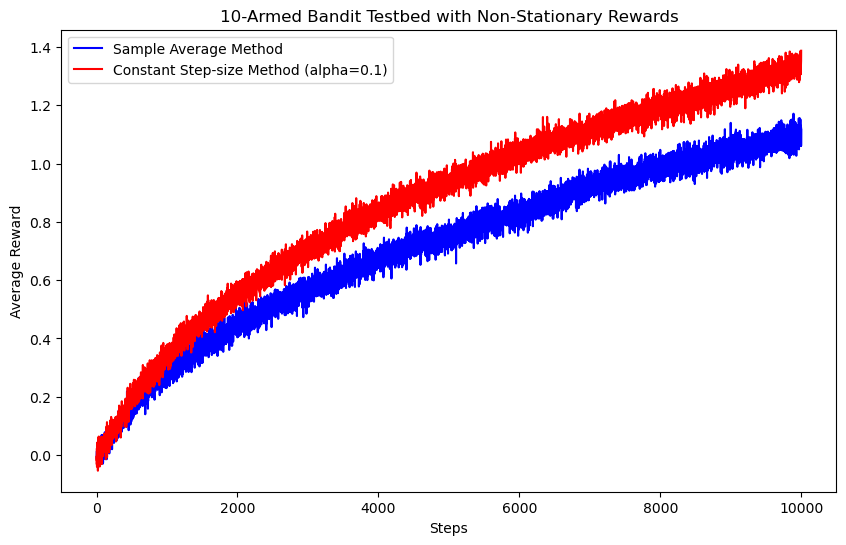

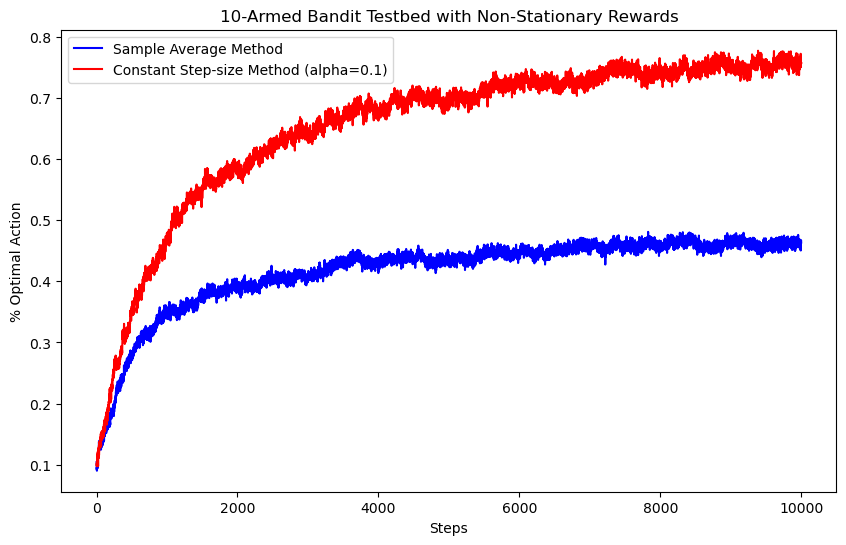

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class KArmedBandit:
    def __init__(self, k=1, sample_average=True):
        self.k = k
        self.sample_average = sample_average
        self.q_true = np.zeros(k)
        self.q_estimate = np.zeros(k)
        self.n_a = np.zeros(k)

    def pull(self, action):
        reward = np.random.normal(loc=self.q_true[action], scale=1)
        self.n_a[action] += 1
        if self.sample_average:
            self.q_estimate[action] += (1 / self.n_a[action]) * (reward - self.q_estimate[action])
        else:
            self.q_estimate[action] += 0.1 * (reward - self.q_estimate[action])
        return reward

    def exploit(self):
        action = np.argmax(self.q_estimate)
        return self.pull(action)

    def update_q_true(self):
        increments = np.random.normal(loc=0, scale=0.01, size=self.k)
        self.q_true += increments

def epsilon_greedy(epsilon=0.1, steps=10000, runs=2000, sample_average=True):
    optimal_actions = np.zeros(steps)
    results = np.zeros(steps)
    for _ in range(runs):
        bandit = KArmedBandit(10, sample_average)
        for step in range(steps):
            bandit.update_q_true()
            if np.random.rand() < epsilon:
                action = np.random.randint(0, 10)
            else:
                action = np.argmax(bandit.q_estimate)
            # Record if we took an optimal action
            if action == np.argmax(bandit.q_true):
                optimal_actions[step] += 1
            results[step] += bandit.pull(action)
    average_rewards = results/runs
    optimal_action_percentage = optimal_actions/runs
    return average_rewards, optimal_action_percentage

# Parameters
steps = 10000
runs = 2000

# Run experiment with epsilon = 0.1
results_sample_avg = epsilon_greedy(epsilon=0.1, steps=steps, runs=runs, sample_average=True)
results_const_step = epsilon_greedy(epsilon=0.1, steps=steps, runs=runs, sample_average=False)

# Plotting the average rewards results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, steps + 1), results_sample_avg[0], label="Sample Average Method", color="Blue")
plt.plot(np.arange(1, steps + 1), results_const_step[0], label="Constant Step-size Method (alpha=0.1)", color="Red")
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('10-Armed Bandit Testbed with Non-Stationary Rewards')
plt.legend()
plt.show()

# Plotting the optimal action percentage results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, steps + 1), results_sample_avg[1], label="Sample Average Method", color="Blue")
plt.plot(np.arange(1, steps + 1), results_const_step[1], label="Constant Step-size Method (alpha=0.1)", color="Red")
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('10-Armed Bandit Testbed with Non-Stationary Rewards')
plt.legend()
plt.show()